# UConn SJI Data Visualizations

In [3]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

# Read CSV file
df = pd.read_csv('/content/UConn SJI Data.csv')

print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (96, 48)


,Participant,Timestamp,Group ID,Institution,S1 (Least Likely)\n\nYour first round of tests did not go well and your usual studying habits are not working,S1 (Most Likely) \n\nYour first round of tests did not go well and your usual studying habits are not working,S2 (Least Likely) \n\nYou want to get involved on campus but are unsure which activities to select,S2 (Most Likely) \n\nYou want to get involved on campus but are unsure which activities to select,S3 (Least Likely)\n\n You are having trouble finding engineering students with whom you relate and you are starting to feel socially isolated\n,S3 (MostLikely)\n\n You are having trouble finding engineering students with whom you relate and you are starting to feel socially isolated\n,...,S18 (Least Likely)\n\nYou no longer think engineering is the major for you but you are anxious about leaving engineering,S18 (Most Likely)\n\nYou no longer think engineering is the major for you but you are anxious about leaving engineering,S19 (Least Likely)\n\nYou have family or personal problems that are distracting you from school,S19 (Most Likely)\n\nYou have family or personal problems that are distracting you from school,"DQ1\n\nWhen you entered this institution, were you:",DQ2\n\nHow many semesters/quarters have you been an undergraduate engineering student at your current institution?\n,"DQ3\n\nDo you identify as neurodiverse (e.g., ADHD, anxiety, autism, bipolar disorder, dyslexia, etc.)?",DQ4\n\nHow would you describe your gender identity?,DQ5\n\nPlease indicate your race/ethnicity\n,DQ6\n\nAre you a first generation college student?\n
0,126,9/26/2024 14:18,no group,University Of Connecticut,Make and work with a study group with peers in...,Review your first round of tests once you get ...,Ask your friends about what organizations they...,Wait and see what opportunities you stumble ac...,Reach out to a mental health professional to t...,Join an engineering student organization,...,Stay in engineering in hopes that you will bec...,Talk to your academic advisor about wanting to...,Try to stay focused on your school work and ho...,Prioritize self care and take a break from sch...,A first-year college student directly from hig...,0-2,No,Man,Black or African American,"No, at least one of my parents has at least a ..."
1,127,9/27/2024 22:57,no group,Uconn,Wait until the next round of tests to see if y...,Start going to office hours regularly for each...,Search Instagram or other social media to find...,Ask your friends about what organizations they...,Reach out to a mental health professional to t...,Continue to focus on your studies and hope tha...,...,Vent to your friends or family about your disc...,Sign up for a non engineering class to explore...,Try to stay focused on your school work and ho...,Talk to your instructors about your situation ...,A first-year college student directly from hig...,0-2,"Yes, and I have an accommodation at my university",Man,Hispanic and/or Latino/a/x,"No, at least one of my parents has at least a ..."
2,128,9/28/2024 15:54,BRIDGE24,University of Connecticut,Visit the student success center to learn a ne...,Review your first round of tests once you get ...,Ask you advisor for recommendations based on y...,Attend campus organization fairs to learn abou...,Talk to family and friends from home to have f...,Continue to focus on your studies and hope tha...,...,Vent to your friends or family about your disc...,Talk to your academic advisor about wanting to...,Prioritize self care and take a break from sch...,Talk to your instructors about your situation ...,A first-year college student directly from hig...,0-2,No,Man,"African, Black or African American","No, at least one of my parents has at least a ..."
3,129,9/28/2024 19:30,BRIDGE24,University of Connecticut,Wait until the next round of tests to see if y...,Review your first round of tests once you get ...,Wait and see what opportunities you stumble ac...,Ask your friends about what organizations they...,J

In [4]:
# Columns

print("\nColumn names:")
print(df.columns)

print("\nData types:")
print(df.dtypes)


Column names:
Index(['Participant', 'Timestamp', 'Group ID', 'Institution',
       'S1 (Least Likely)\n\nYour first round of tests did not go well and your usual studying habits are not working',
       'S1 (Most Likely) \n\nYour first round of tests did not go well and your usual studying habits are not working',
       'S2 (Least Likely) \n\nYou want to get involved on campus but are unsure which activities to select',
       'S2 (Most Likely) \n\nYou want to get involved on campus but are unsure which activities to select',
       'S3 (Least Likely)\n\n You are having trouble finding engineering students with whom you relate and you are starting to feel socially isolated\n',
       'S3 (MostLikely)\n\n You are having trouble finding engineering students with whom you relate and you are starting to feel socially isolated\n',
       'S4 (Least Likely)\n\nYour classes start soon and you don't have the financial means to purchase the required books\n',
       'S4 (Most Likely)\n\nYour 

## Race x Gender Data

In [41]:
# Race/Ethnicity (DQ5) × Gender Identity (DQ4) Visualization
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Columns

def normalize(name):
    return re.sub(r'\s+', ' ', str(name).strip().lower()) if isinstance(name, str) else name

norm_map = {col: normalize(col) for col in df.columns}

GENDER_COL = next((c for c, n in norm_map.items() if n.startswith("dq4") and "gender" in n), None)
RACE_COL   = next((c for c, n in norm_map.items() if n.startswith("dq5") and "race" in n), None)

print("Detected columns:")
print("  Gender:", GENDER_COL)
print("  Race/Ethnicity:", RACE_COL)

# 2. Clean Data

df[GENDER_COL] = df[GENDER_COL].astype(str).str.strip()
df[RACE_COL]   = df[RACE_COL].astype(str).str.strip()

# Official Race/Ethnicity order (as per your form)
RACE_ORDER = [
    "American Indian or Alaska Native",
    "African",
    "Caribbean",
    "Black or African American",
    "Hispanic and/or Latino/a/x",
    "East Asian (e.g., Chinese, Korean, Japanese, etc.)",
    "Southeast Asian (e.g., Thai, Vietnamese, Burmese, etc.)",
    "South Asian (e.g., Indian, Pakistan, Bangladeshi, Sri Lankan, etc.)",
    "Middle Eastern or North African",
    "Native Hawaiian or other Pacific Islander",
    "White (e.g., European Descent)",
    "Other",
    "Prefer not to answer"
]

# Value Counts

print("\n--- Race/Ethnicity Counts ---")
race_counts = df[RACE_COL].value_counts().reindex(RACE_ORDER)
display(race_counts.to_frame(name="Count"))

print("\n--- Gender Counts ---")
gender_counts = df[GENDER_COL].value_counts()
display(gender_counts.to_frame(name="Count"))


Detected columns:
  Gender: DQ4

How would you describe your gender identity?
  Race/Ethnicity: DQ5

Please indicate your race/ethnicity


--- Race/Ethnicity Counts ---


,Count
DQ5 Please indicate your race/ethnicity,
American Indian or Alaska Native,1.0
African,2.0
Caribbean,5.0
Black or African American,14.0
Hispanic and/or Latino/a/x,18.0
"East Asian (e.g., Chinese, Korean, Japanese, etc.)",5.0
"Southeast Asian (e.g., Thai, Vietnamese, Burmese, etc.)",4.0
"South Asian (e.g., Indian, Pakistan, Bangladeshi, Sri Lankan, etc.)",9.0
Middle Eastern or North African,5.0



--- Gender Counts ---


,Count
DQ4 How would you describe your gender identity?,
Woman,50
Man,44
Prefer not to answer,2


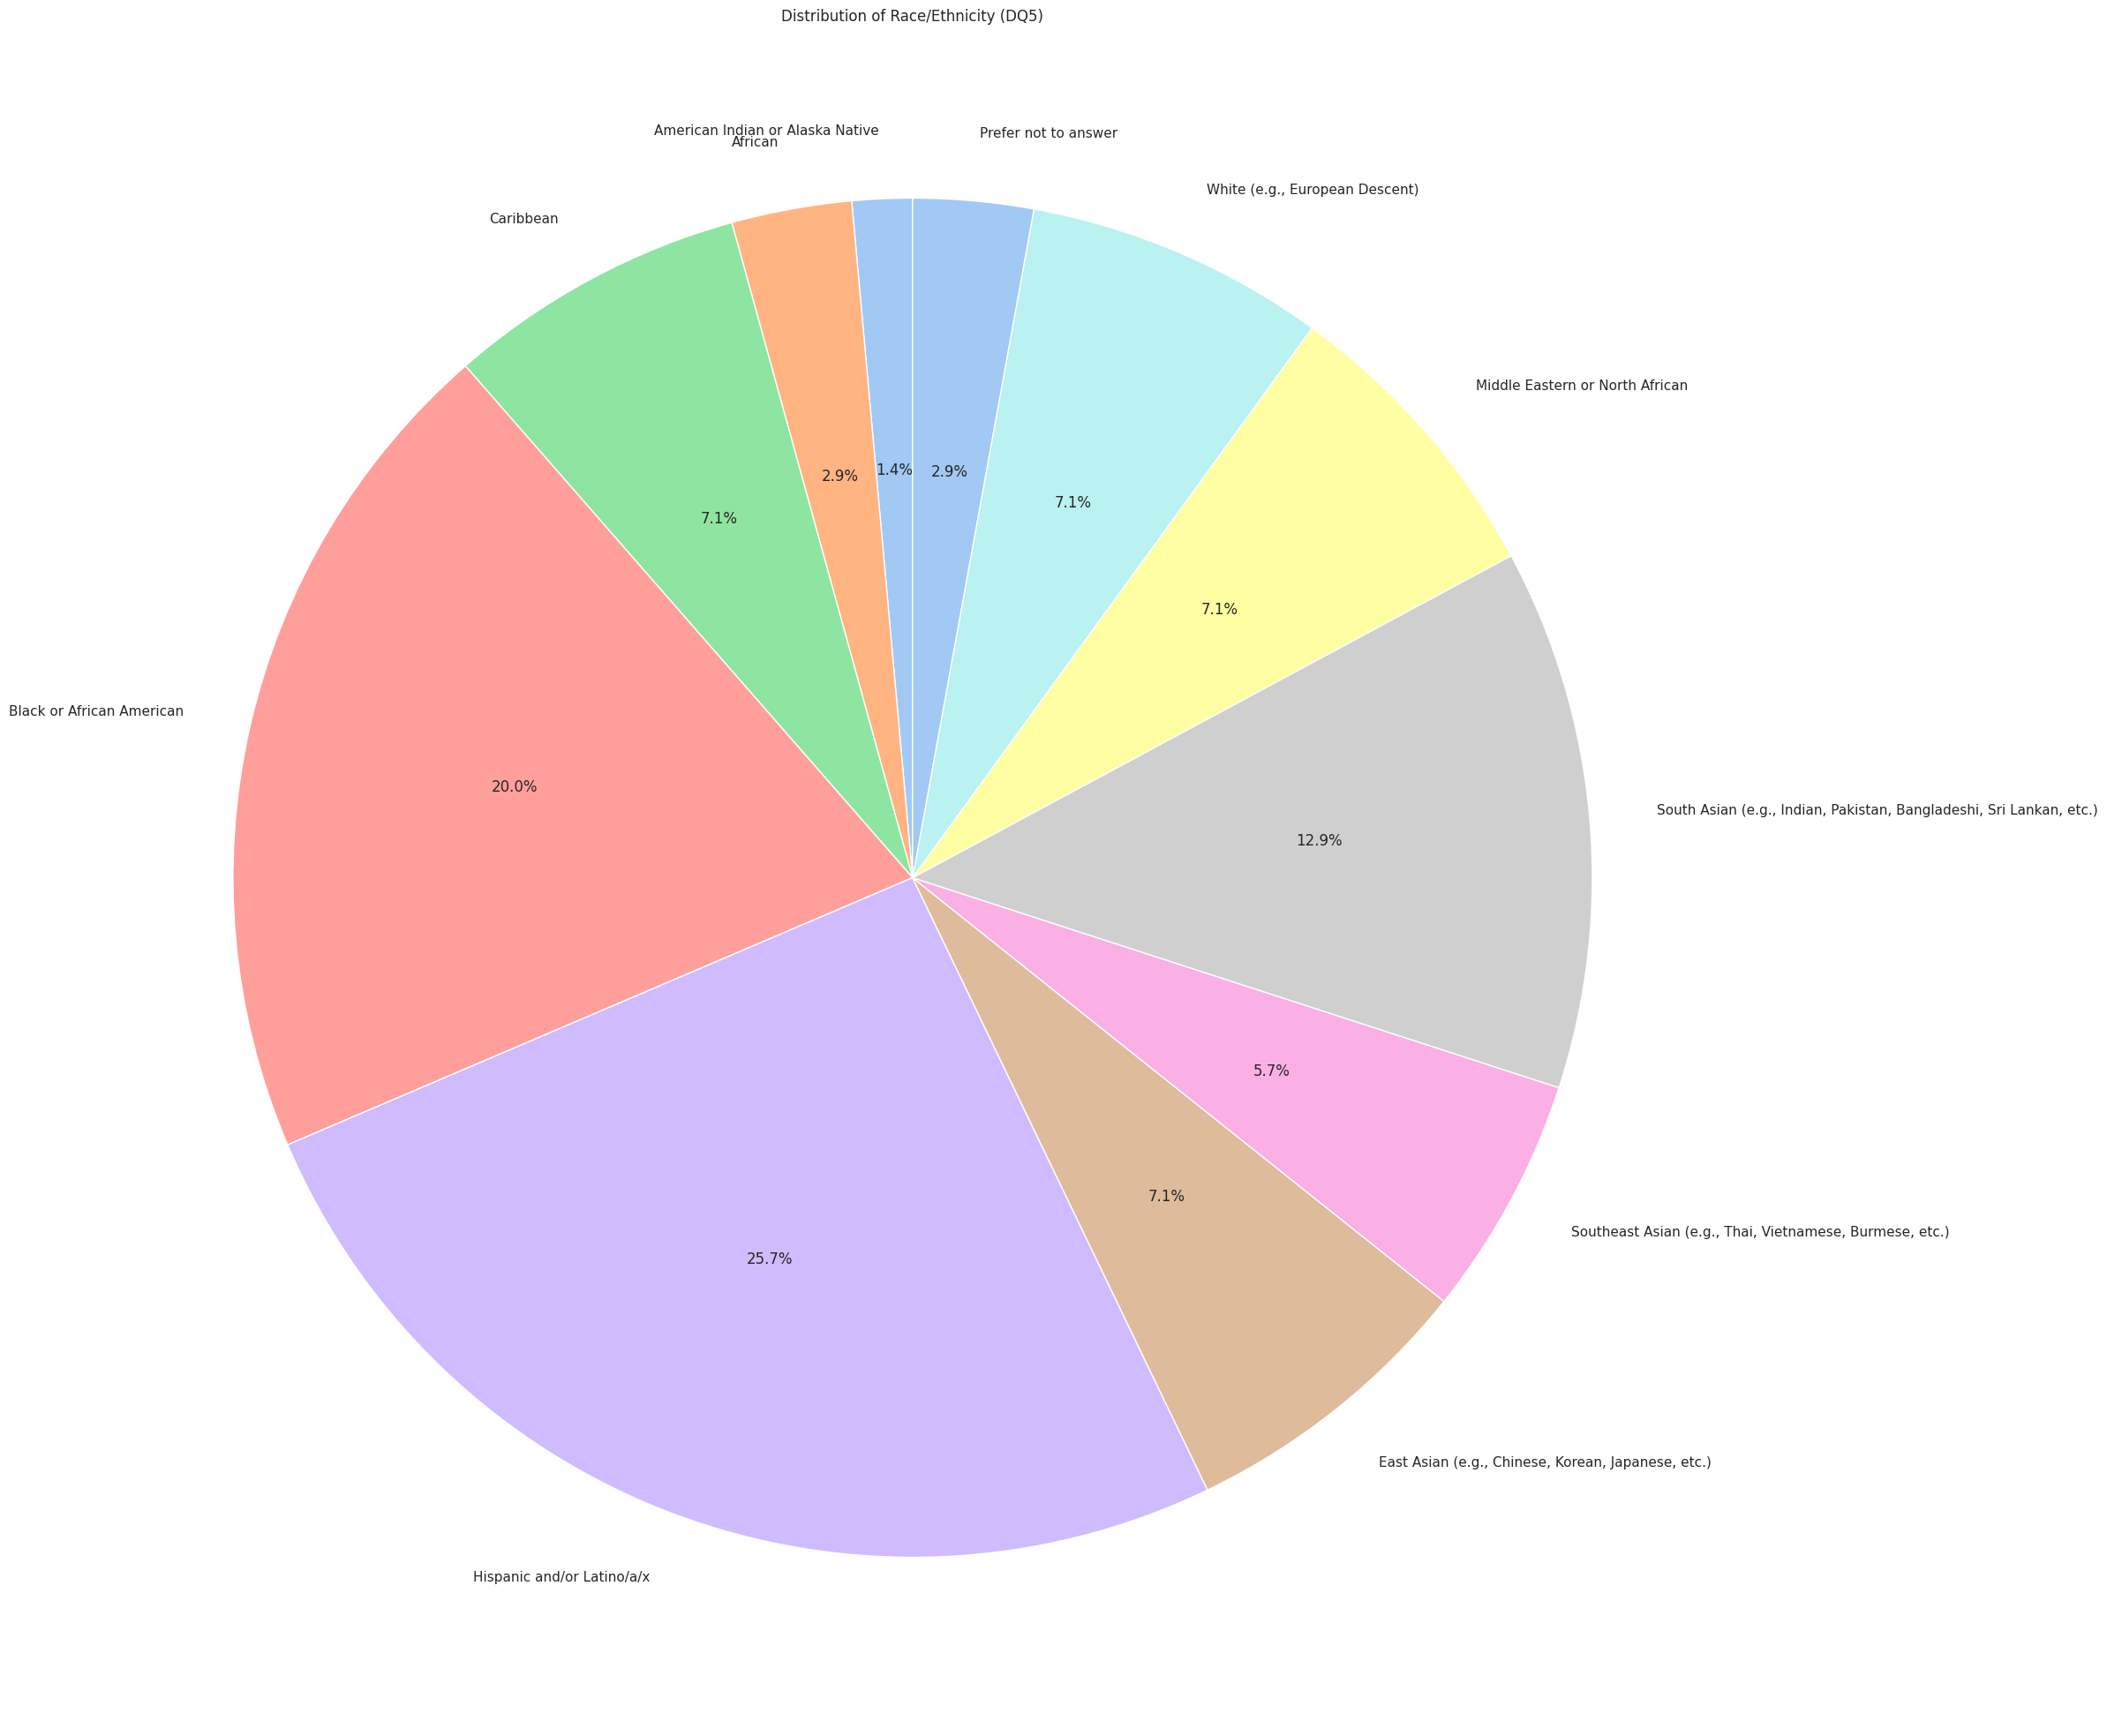

In [42]:
# Race/Ethnicity pie chart
plt.figure(figsize=(25, 25))
race_counts.dropna().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.title("Distribution of Race/Ethnicity (DQ5)")
plt.ylabel("")
plt.show()

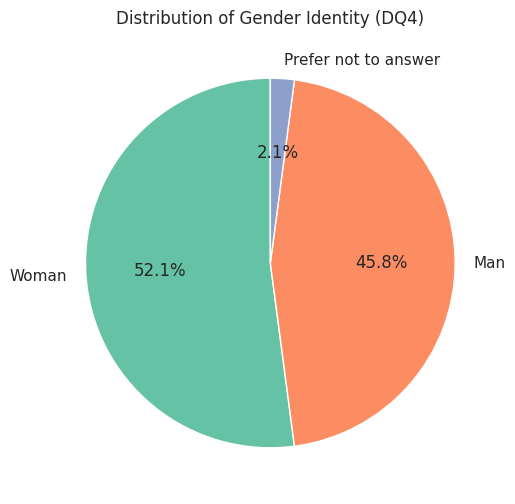

In [43]:
# Gender pie chart
plt.figure(figsize=(6,6))
df[GENDER_COL].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2")
)
plt.title("Distribution of Gender Identity (DQ4)")
plt.ylabel("")
plt.show()

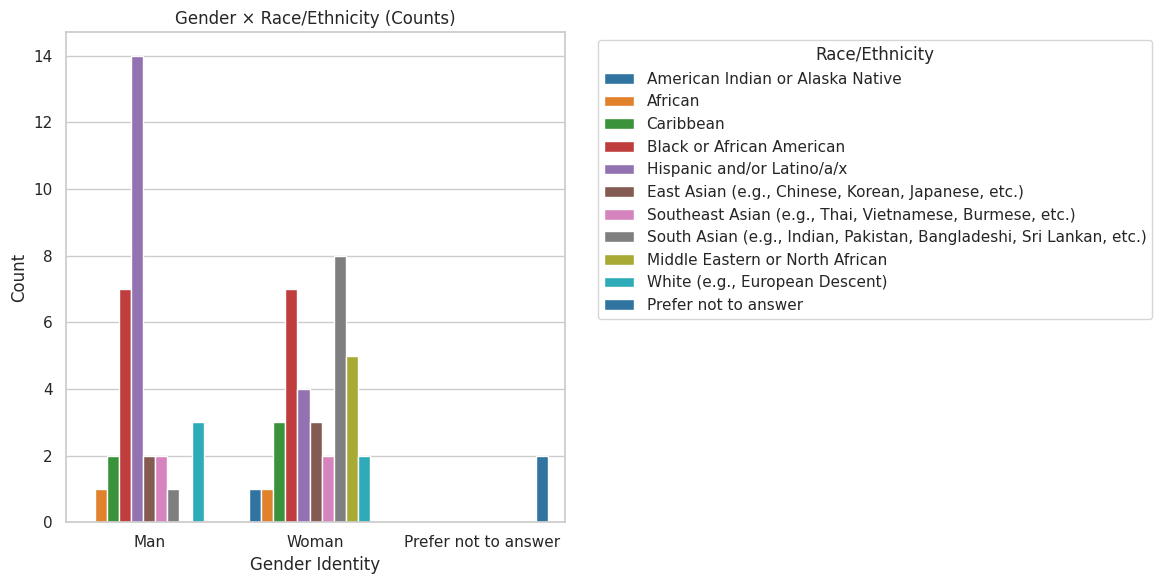

In [44]:
# Grouped Bar Chart — Gender × Race/Ethnicity

plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x=GENDER_COL,
    hue=RACE_COL,
    hue_order=[r for r in RACE_ORDER if r in df[RACE_COL].unique()],
    palette="tab10"
)
plt.title("Gender × Race/Ethnicity (Counts)")
plt.xlabel("Gender Identity")
plt.ylabel("Count")
plt.legend(title="Race/Ethnicity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

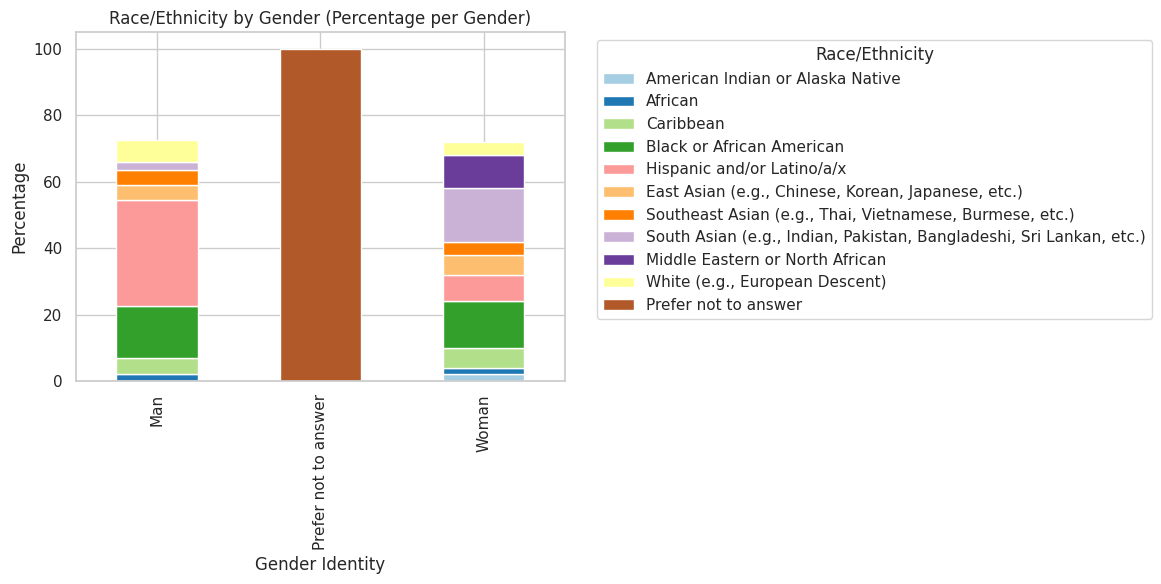

In [45]:
# Percent-Stacked Bar Chart — Race/Ethnicity by Gender
ct = pd.crosstab(df[GENDER_COL], df[RACE_COL])
pct = ct.div(ct.sum(axis=1), axis=0) * 100
pct = pct[[r for r in RACE_ORDER if r in pct.columns]]  # reorder columns

pct.plot(kind="bar", stacked=True, figsize=(12,6), colormap="Paired")
plt.title("Race/Ethnicity by Gender (Percentage per Gender)")
plt.xlabel("Gender Identity")
plt.ylabel("Percentage")
plt.legend(title="Race/Ethnicity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## First-Generation x Gender

In [46]:
# Visualizing Gender Identity (DQ4) and First-Generation Status (DQ6) ---

import re

# Detect actual column names (handles line breaks/newlines)
def normalize(name):
    if not isinstance(name, str):
        return name
    return re.sub(r'\s+', ' ', name.strip().lower())

norm_map = {col: normalize(col) for col in df.columns}

GENDER_COL = next((c for c, n in norm_map.items() if n.startswith("dq4") and "gender identity" in n), None)
FIRSTGEN_COL = next((c for c, n in norm_map.items() if n.startswith("dq6") and "first generation" in n), None)

print("Detected columns:")
print("Gender:", GENDER_COL)
print("First-generation:", FIRSTGEN_COL)

# Clean values
df[GENDER_COL] = df[GENDER_COL].astype(str).str.strip()
df[FIRSTGEN_COL] = df[FIRSTGEN_COL].astype(str).str.strip()

# Show unique responses
print("\nUnique Gender Responses:")
print(df[GENDER_COL].unique())
print("\nUnique First-Gen Responses:")
print(df[FIRSTGEN_COL].unique())


Detected columns:
Gender: DQ4

How would you describe your gender identity?
First-generation: DQ6

Are you a first generation college student?


Unique Gender Responses:
['Man' 'Woman' 'Prefer not to answer']

Unique First-Gen Responses:
["No, at least one of my parents has at least a bachelor's degree"
 "Yes, none of my parents have a bachelor's degree" 'Prefer not to answer']


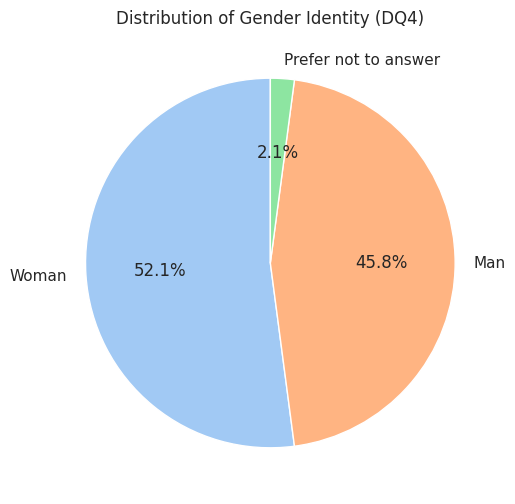

In [47]:
# --- Gender Identity Pie Chart ---
plt.figure(figsize=(6,6))
df[GENDER_COL].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.title("Distribution of Gender Identity (DQ4)")
plt.ylabel("")
plt.show()

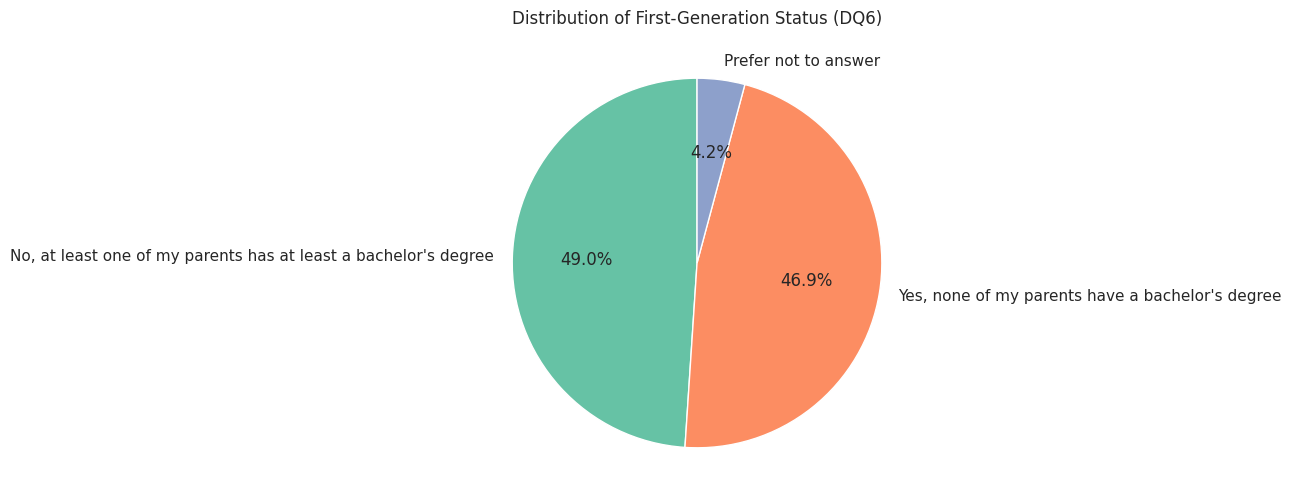

In [48]:
# --- First-Generation Status Pie Chart ---
plt.figure(figsize=(6,6))
df[FIRSTGEN_COL].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2")
)
plt.title("Distribution of First-Generation Status (DQ6)")
plt.ylabel("")
plt.show()

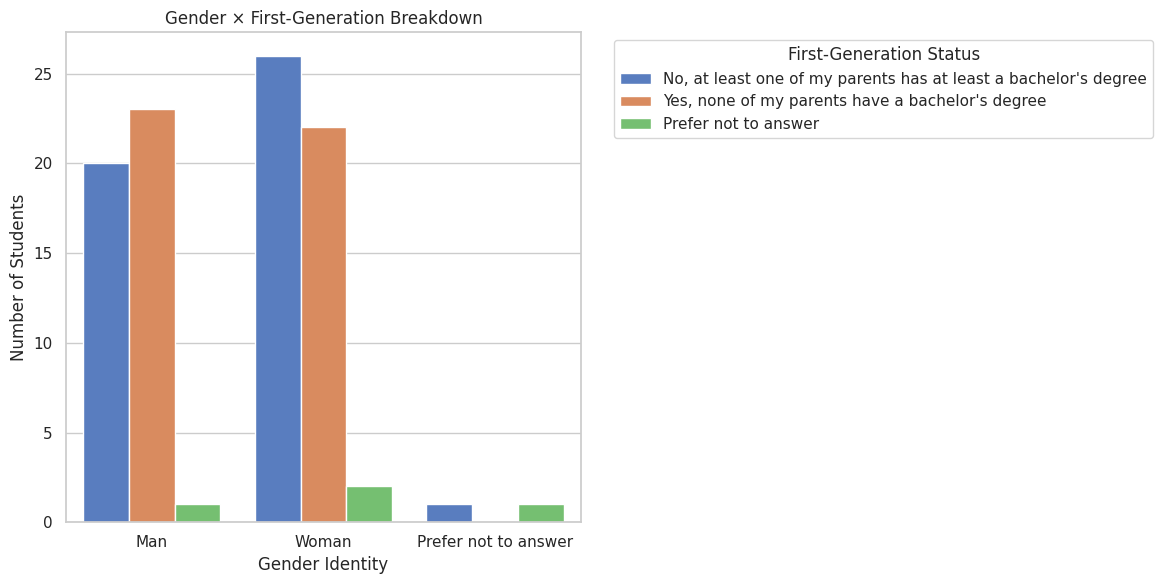

In [49]:
# --- Gender × First-Generation Bar Chart ---
plt.figure(figsize=(12,6))
sns.countplot(data=df, x=GENDER_COL, hue=FIRSTGEN_COL, palette="muted")
plt.title("Gender × First-Generation Breakdown")
plt.xlabel("Gender Identity")
plt.ylabel("Number of Students")
plt.legend(title="First-Generation Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


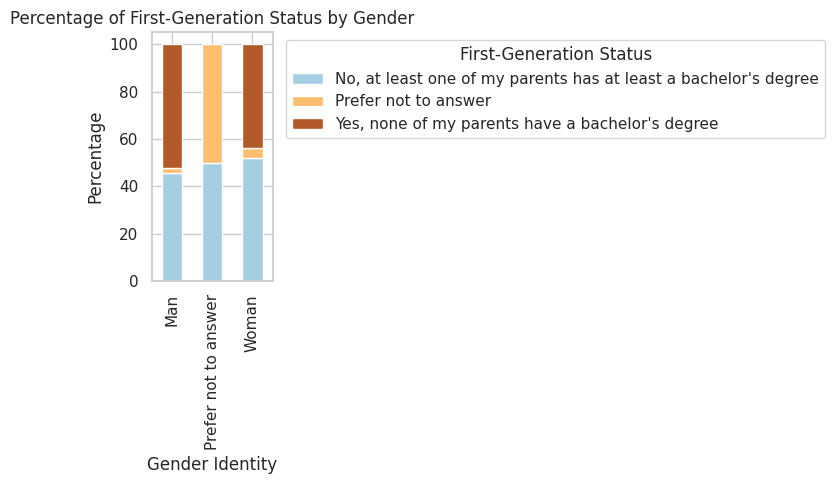

In [50]:
# --- Percent stacked version (helps compare proportions) ---
ct = pd.crosstab(df[GENDER_COL], df[FIRSTGEN_COL])
pct = ct.div(ct.sum(axis=1), axis=0) * 100

pct.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Paired')
plt.title("Percentage of First-Generation Status by Gender")
plt.xlabel("Gender Identity")
plt.ylabel("Percentage")
plt.legend(title="First-Generation Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## Neurodivergence x Gender

In [51]:
# Neurodiversity (DQ3) × Gender (DQ4) Visualization
import re

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


# Columns

def normalize(name):
    return re.sub(r'\s+', ' ', str(name).strip().lower()) if isinstance(name, str) else name

norm_map = {col: normalize(col) for col in df.columns}

GENDER_COL = next((c for c, n in norm_map.items() if n.startswith("dq4") and "gender" in n), None)
NEURO_COL  = next((c for c, n in norm_map.items() if n.startswith("dq3") and "neuro" in n), None)

print("Detected columns:")
print("  Gender:", GENDER_COL)
print("  Neurodiversity:", NEURO_COL)


# Response order

NEURO_ORDER = [
    "Yes, and I have an accommodation at my university",
    "Yes, and I do not have an accommodation",
    "I think I might be but do not have a diagnosis",
    "No",
    "Prefer not to answer"
]


# Clean Columns

df[GENDER_COL] = df[GENDER_COL].astype(str).str.strip()
df[NEURO_COL]  = df[NEURO_COL].astype(str).str.strip()



Detected columns:
  Gender: DQ4

How would you describe your gender identity?
  Neurodiversity: DQ3

Do you identify as neurodiverse (e.g., ADHD, anxiety, autism, bipolar disorder, dyslexia, etc.)?


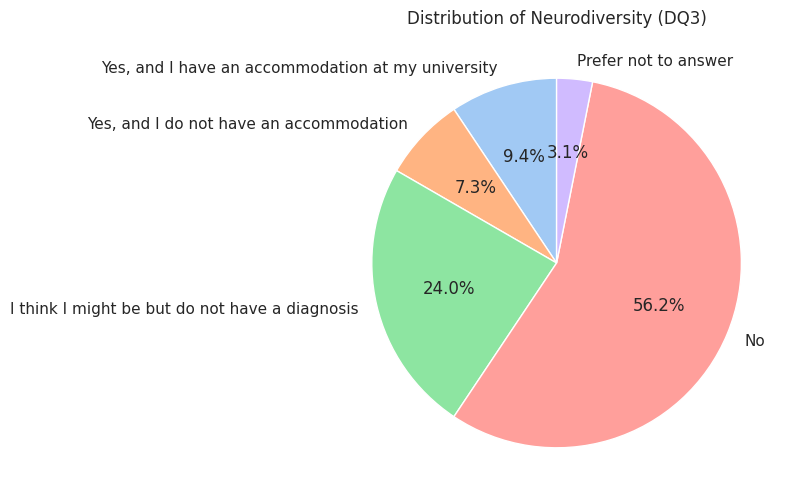

In [52]:
# Neurodiversity pie chart
plt.figure(figsize=(6,6))
df[NEURO_COL].value_counts().reindex(NEURO_ORDER).dropna().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Distribution of Neurodiversity (DQ3)")
plt.ylabel("")
plt.show()



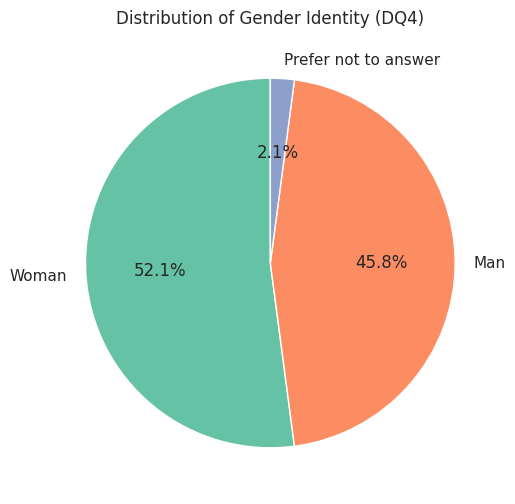

In [53]:
# Gender pie chart
plt.figure(figsize=(6,6))
df[GENDER_COL].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Distribution of Gender Identity (DQ4)")
plt.ylabel("")
plt.show()


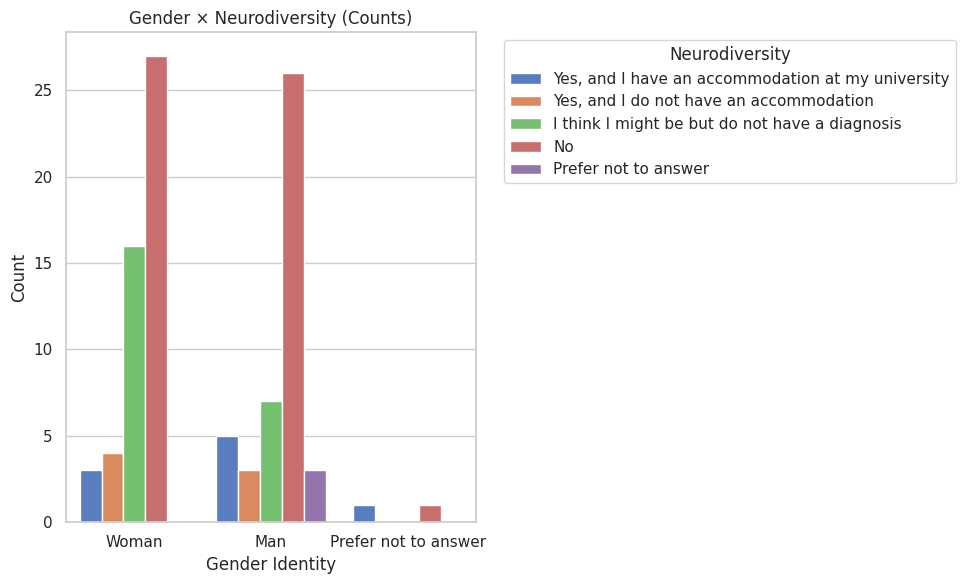

In [54]:
# Gender × Neurodiversity

plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x=GENDER_COL,
    hue=NEURO_COL,
    order=df[GENDER_COL].value_counts().index,
    hue_order=NEURO_ORDER,
    palette="muted"
)
plt.title("Gender × Neurodiversity (Counts)")
plt.xlabel("Gender Identity")
plt.ylabel("Count")
plt.legend(title="Neurodiversity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


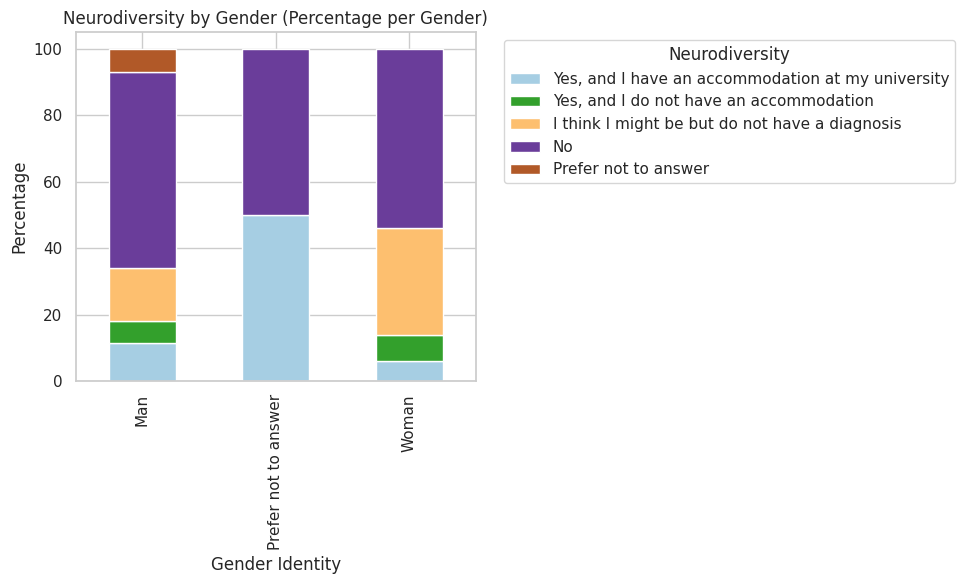

In [55]:
# Percent Stacked Bar Chart

ct = pd.crosstab(df[GENDER_COL], df[NEURO_COL])
pct = ct.div(ct.sum(axis=1), axis=0) * 100
pct = pct[NEURO_ORDER]  # reorder to match consistent order

pct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Paired')
plt.title("Neurodiversity by Gender (Percentage per Gender)")
plt.xlabel("Gender Identity")
plt.ylabel("Percentage")
plt.legend(title="Neurodiversity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()